# HW 1 Problem 1: CK&D Problem 4.9 


In [17]:
import pandas as pd
import numpy as np
import time
import cantera as ct
from matplotlib import pyplot as plt
import csv
import math
from sklearn.linear_model import LinearRegression

from IPython.display import Image


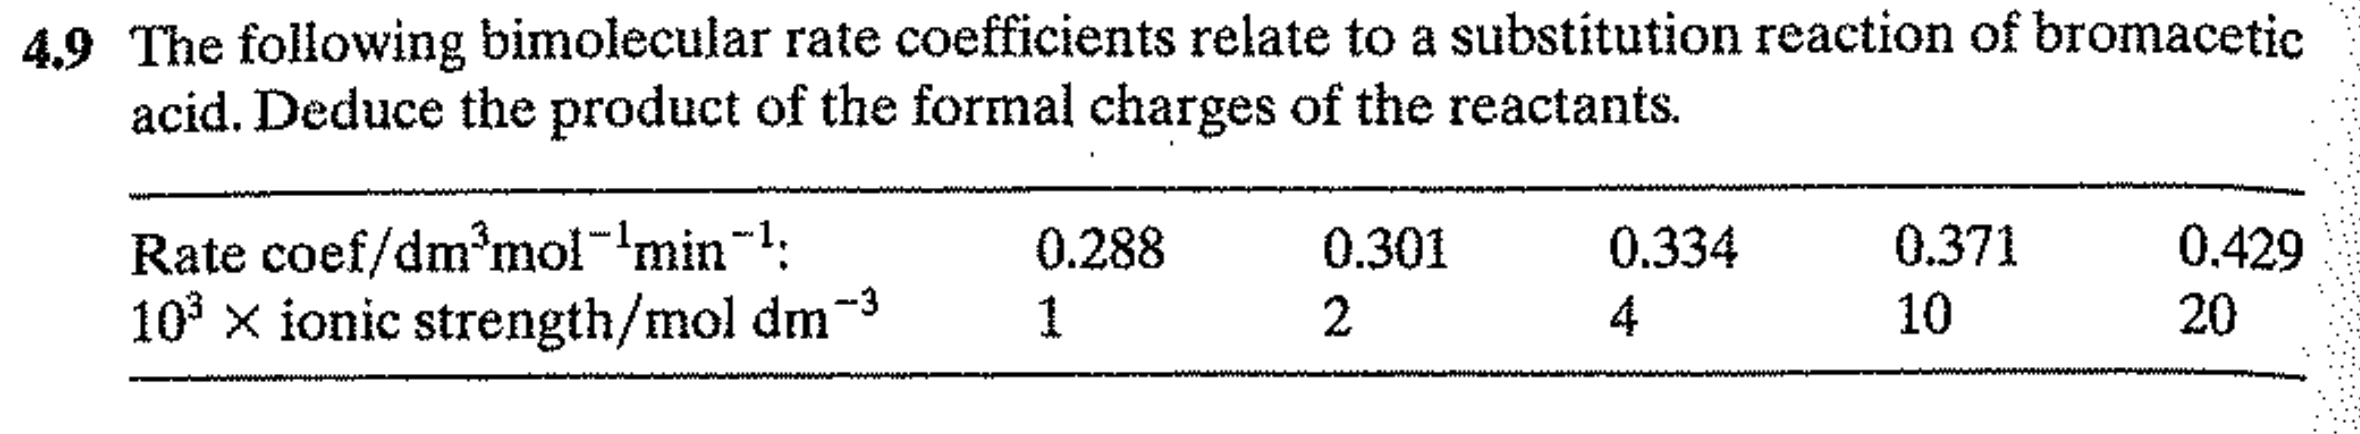

In [13]:
Image(filename="/Users/blais.ch/_01_code/MIT_Kinetics_HW/assignments/HW4/images/Problem_4_9.png")


The following bimolecular rate coefficients relate to a substitution reaction of bromeatic acid. Deduce the product of the formal charges of the reactants. 

| rate coef $dm^3 mol^{-1} min^{-1}$ | $10^3 \times$ ionic strength $mol$ $dm^{-3}$ |
| --- | --- |
| 0.288 | 1 |
| 0.301 | 2 |
| 0.334 | 4 |
| 0.371 | 10 |
| 0.429 | 20 |  



In [30]:
rate_coef = [0.288,0.301,0.334,0.371,0.429]
ionic_strength = [1e3,2e3,4e3,10e3,20e3]
log_rate_coeff = []
half_ionic_str = []
for i in range (0, len(rate_coef)):

    log_rate_coeff.append(math.log10(rate_coef[i]/rate_coef[0]))
    half_ionic_str.append(ionic_strength[i]**(0.5))


Text(0.5, 0, 'Ionic Strength^1/2')

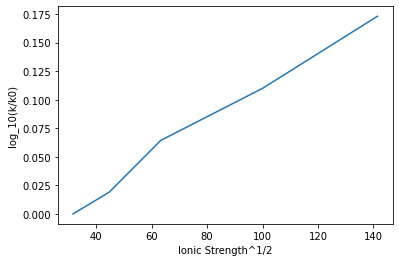

In [33]:
plt.plot(half_ionic_str,log_rate_coeff)
plt.ylabel("log_10(k/k0)")
plt.xlabel("Ionic Strength^1/2")

In [34]:
half_ionic_str = np.array(half_ionic_str).reshape((-1, 1))
log_rate_coeff = np.array(log_rate_coeff)

$$\Delta G = -\frac{\varepsilon -1}{2\varepsilon +1} \frac{\mu^2}{R^3}\left[ 1 - \frac{\varepsilon -1}{2\varepsilon +1} \frac{2\alpha}{R^3} \right ]$$

In [35]:
print(half_ionic_str)
print(log_rate_coeff)

[[ 31.6227766 ]
 [ 44.72135955]
 [ 63.2455532 ]
 [100.        ]
 [141.42135624]]
[0.         0.01917401 0.06435398 0.10998142 0.1730648 ]


In [37]:
model = LinearRegression().fit(half_ionic_str,log_rate_coeff)


In [38]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -0.04594213958557526
slope: [0.00156501]


In [40]:
# if solution is aqueous at 25C, slope = 1.02*ZaZb
slope = model.coef_
Answer = slope/1.02
print("Product of formal charges:",Answer)

Product of formal charges: [0.00153432]
